In [94]:
!pip install pennylane

In [ ]:
pip install pennylane pennylane-qiskit qiskit

# SCRIPT WALKTHROUGH

In [117]:
import pandas as pd
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.model_selection import train_test_split

In [96]:
import pandas as pd
import numpy as np

# Load the dataset
data_path = '/kaggle/input/creditcardfraud/creditcard.csv'
data = pd.read_csv(data_path)

# Display basic information about the dataset
print(data.info())

# Check for null values
print(data.isnull().sum())

# Normalize the features (excluding 'Time' and 'Amount' for simplicity)
data['NormalizedAmount'] = (data['Amount'] - data['Amount'].mean()) / data['Amount'].std()
data = data.drop(['Time', 'Amount'], axis=1)  # Drop non-relevant features

# Select features for training
X = data.drop('Class', axis=1).values  # Features
Y = data['Class'].values  # Target variable (fraud = 1, not fraud = 0)

# Convert the labels to -1 and 1 for the quantum model
Y = np.where(Y == 1, 1, -1)  # Convert 1 to 1 and 0 to -1


# Determine the number of samples to take
sample_size = int(len(data) 

# Use the first `sample_size` rows from the dataset without sampling
X_sampled = X[:sample_size]
Y_sampled = Y[:sample_size]

# Display the shape of the sampled data
print(f"Using {sample_percentage * 100}% of the data:")
print(f"X_sampled shape: {X_sampled.shape}")
print(f"Y_sampled shape: {Y_sampled.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

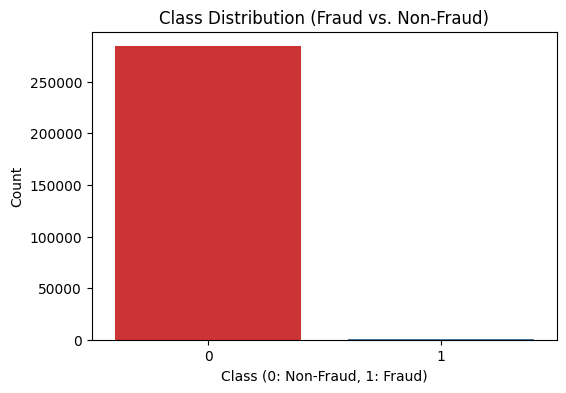

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for the target class (fraud vs. non-fraud)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [125]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
import pandas as pd
from sklearn.preprocessing import StandardScaler, Binarizer

# Quantum device with 6 qubits
dev = qml.device("default.qubit", wires=6)

In [126]:
# Updated state preparation using RX gates
def state_preparation(x):
    for i in range(6):  # Assuming 6 qubits
        qml.RX(np.pi * x[i], wires=i)  # Use the input data as an angle for rotation

In [127]:
# Variational circuit layer with parameterized gates and CRX entanglement
def layer(layer_weights):
    # Apply rotational gates to each qubit
    for wire in range(6):  # Assuming 6 qubits
        qml.Rot(*layer_weights[wire], wires=wire)  # Rot gate with 3 parameters per qubit

    # Entanglement using controlled RX gates
    for i in range(5):
        qml.CRX(layer_weights[i, 0], wires=[i, i + 1])  # Apply CRX for entanglement

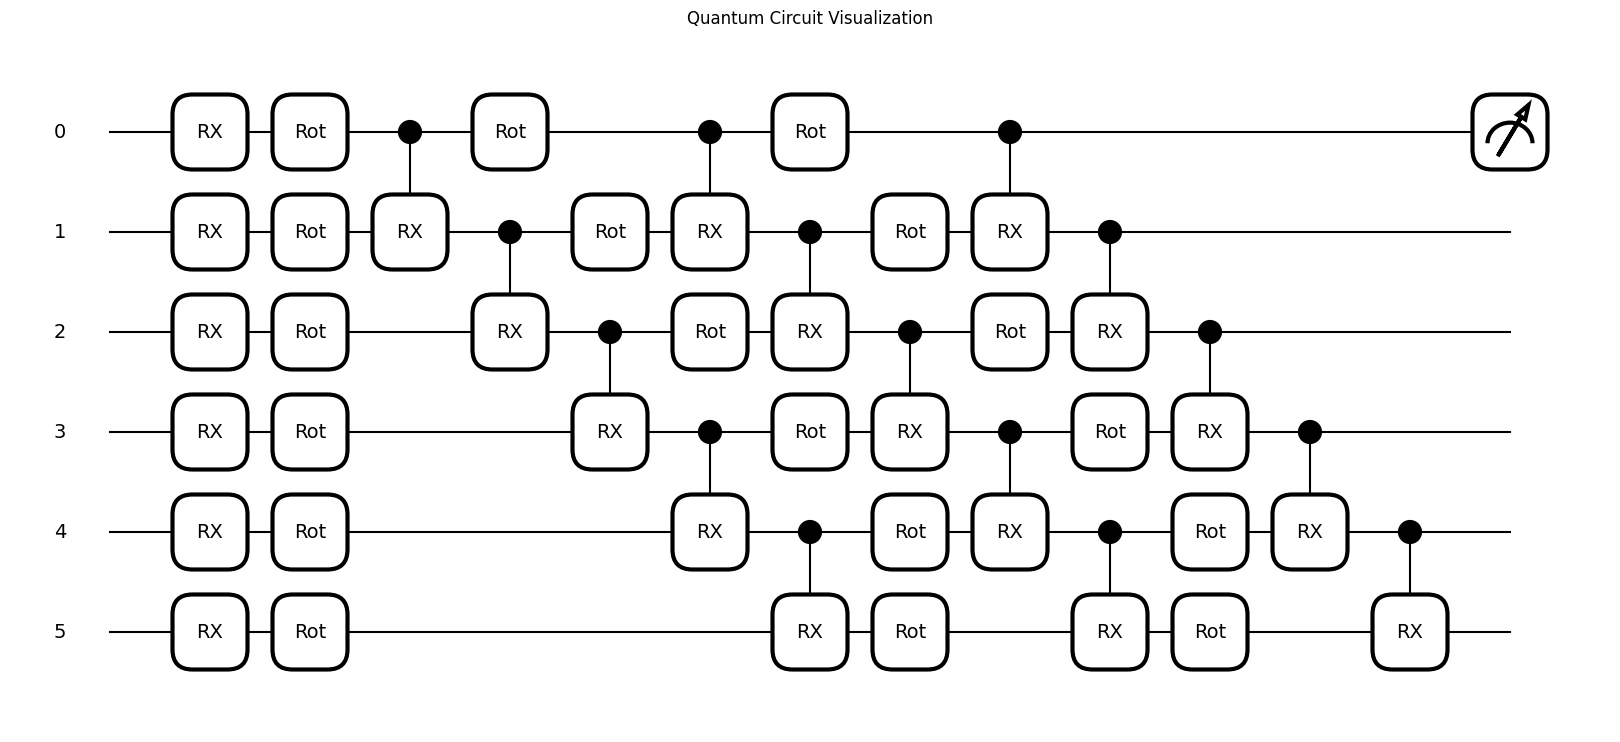

In [128]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Define the variational circuit with visualization
@qml.qnode(dev)
def circuit(weights, x):
    state_preparation(x)
    for layer_weights in weights:
        layer(layer_weights)
    return qml.expval(qml.PauliZ(0))

# Draw the circuit and save it as an image
def draw_circuit(weights, x):
    circuit(weights, x)  # Call the circuit to build it
    fig, _ = qml.draw_mpl(circuit)(weights, x)  # Use draw_mpl to visualize
    plt.title("Quantum Circuit Visualization")
    plt.show()

# Example usage to draw the circuit with initial weights and input
draw_circuit(weights_init, X_binarized[0])  # Drawing the circuit with first sample input

In [129]:
# Initialize weights and bias using qml.numpy to enable gradient tracking
np.random.seed(0)
num_qubits = 6  # Increased number of qubits
num_layers = 3   # Increased number of layers for complexity

# Initialize weights with qml.numpy
weights_init = 0.01 * qml.numpy.random.randn(num_layers, num_qubits, 3)  # Removed requires_grad=True
weights_init.requires_grad = True  # Enable gradient tracking

# Initialize bias with qml.numpy
bias_init = qml.numpy.zeros(1)  # Create a zero tensor
bias_init.requires_grad = True  # Enable gradient tracking

In [130]:
# Define the cost function
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return np.mean((predictions - Y) ** 2)  # Mean Squared Error as the loss function

# Define the accuracy function
def accuracy(Y_true, Y_pred):
    return np.mean(np.sign(Y_pred) == Y_true)

In [ ]:
# Training loop
for it in range(num_iterations):
    # Perform one optimizer step on the sampled dataset
    weights_init, bias_init = opt.step(cost, weights_init, bias_init, X=X_sampled, Y=Y_sampled)

    # Compute accuracy on the sampled dataset
    predictions = [variational_classifier(weights_init, bias_init, x) for x in X_sampled]
    predictions = np.sign(predictions)  # Convert predictions to {-1, 1}

    # Compute training cost and accuracy
    current_cost = cost(weights_init, bias_init, X_sampled, Y_sampled)
    train_accuracy = accuracy(Y_sampled, predictions)

    # Print training progress
    print(f"Iter: {it + 1:4d} | Cost: {current_cost:0.7f} | Accuracy: {train_accuracy:0.7f}")

# Final evaluation on the sampled dataset
final_predictions = [variational_classifier(weights_init, bias_init, x) for x in X_sampled]
final_predictions = np.sign(final_predictions)
final_accuracy = accuracy(Y_sampled, final_predictions)

print(f"Final Accuracy on Sampled Dataset: {final_accuracy:0.7f}")

# Code for Classical Neural Network Classifier

In [109]:
Y_sampled = Y_sampled.astype(float)  # Convert target labels to float

In [112]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Explore the dataset

# Separate features and labels
X = data.drop(columns=['Class'])  # All columns except 'Class'
Y = data['Class']  # The 'Class' column represents the target

# Preprocess the data (standardize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Convert data to numpy arrays for easier handling in PyTorch
X_sampled = np.array(X_scaled)
Y_sampled = np.array(Y)

# Convert labels to binary (0 and 1)
Y_sampled = (Y_sampled == 1).astype(float)  # Ensure labels are binary

# Convert data to torch tensors
X_sampled_tensor = torch.tensor(X_sampled, dtype=torch.float32)
Y_sampled_tensor = torch.tensor(Y_sampled, dtype=torch.float32).unsqueeze(1)  # Reshape Y to (n,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled_tensor, Y_sampled_tensor, test_size=0.2, random_state=42)

# Define the classical neural network architecture
class ClassicalNN(nn.Module):
    def __init__(self, input_size):
        super(ClassicalNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)  # Binary classification, single output neuron
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))  # Sigmoid output
        return x

# Initialize the model
model = ClassicalNN(input_size=X_sampled.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (for 3 epochs)
num_epochs = 3
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate on test set
with torch.no_grad():
    test_outputs = model(X_test)
    test_predictions = (test_outputs > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

    # Calculate accuracy
    accuracy = (test_predictions.eq(y_test).sum() / float(y_test.shape[0])).item()
    print(f'Test Accuracy: {accuracy:.4f}')

Epoch [1/3], Loss: 0.6447
Epoch [2/3], Loss: 0.6320
Epoch [3/3], Loss: 0.6195
Test Accuracy: 0.9977
